### Scripts to construct a water balance from LIS ouptut, for GRACE comparison and forward modeling

In [1]:
# Import the necessary libraries

%matplotlib inline
import os
import sys
import datetime

import xarray as xr

import pandas as pd

from dask.diagnostics import ProgressBar
from collections import OrderedDict

import seaborn as sb

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from himatpy.LIS import utils as LISutils

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [7]:
os.getcwd()

'/mnt/d/UW_work/git/WBM_HiMAT/scratch_notebooks'

In [8]:
data_dir = '/mnt/d/UW_work/git/WBM_HiMAT/scratch_notebooks/total_mass_wrong'

In [ ]:
def process_lis_data(data_dir, nc_path, **kwargs)
    """
    This function process LIS Data by breaking it up into yearly netcdf. Only certain variables are exported.
    
    Parameters
    ----------
    data_dir : String.
        The location of the Raw LIS NetCDF Data
    nc_path : String.
        The location of the output NetCDF.
    **kwargs: Other keyword arguments that works with get_xr_dataset
    
    Returns
    -------
    None
    """
    # Open all files into a single xarray dataset
    ds = get_xr_dataset(data_dir, fname=None, multiple_nc=True, chunks={'time': 1})
    desiredds = ds[['Qsm_tavg','Rainf_tavg','Qs_tavg','Snowf_tavg','Qsb_tavg','Evap_tavg','TWS_tavg']]
    
    dt = pd.DatetimeIndex(desiredds.coords['time'].values)
    year_starts = dt[dt.is_year_start]
    year_ends = dt[dt.is_year_end]
    yearslices = [(x,y) for x,y in zip(year_starts, year_ends)]
    
    if not os.path.exists(ncpath):
        os.mkdir(ncpath)
    
    bar = progressbar.ProgressBar()
    for ys, ye in bar(yearslices):
        print('Processing {}...'.format(ys.year))
        slicedds = desiredds.sel(time = slice(ys, ye))
        procds = slicedds.apply(lambda x: process_da(x))
        procds.to_netcdf(os.path.join(ncpath, 'LIS_{}.nc'.format(ys.year)))

In [9]:
# Open all files into a single xarray dataset
ds = xr.open_mfdataset('/mnt/d/UW_work/git/WBM_HiMAT/scratch_notebooks/total_mass_wrong/*.nc')

In [10]:
ds

<xarray.Dataset>
Dimensions:           (lat: 444, lon: 786, time: 132)
Coordinates:
  * lat               (lat) float64 7.45 7.55 7.65 7.75 7.85 7.95 8.05 8.15 ...
  * lon               (lon) float64 56.55 56.65 56.75 56.85 56.95 57.05 ...
  * time              (time) datetime64[ns] 2002-01-15 2002-02-15 2002-03-15 ...
Data variables:
    crs               (time) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' ...
    total_mass        (time, lat, lon) float32 dask.array<shape=(132, 444, 786), chunksize=(12, 444, 786)>
    total_mass_sigma  (time, lat, lon) float32 dask.array<shape=(132, 444, 786), chunksize=(12, 444, 786)>
Attributes:
    System:          magma
    source:          Unreferenced Data
    history:         Created on 2018-06-27 by Alexander Proussevitch (alex.pr...
    FilePath:        /net/nfs/squam/raid/data/WBM_TrANS/HiMAT/era_glaciers_v2...
    NetCDF_version:  netCDF.3.5.1
    Temporal_Res.:   monthly
    references:      http://www.wsag.unh.edu
    title:          

In [11]:
print(ds.total_mass_sigma)

<xarray.DataArray 'total_mass_sigma' (time: 132, lat: 444, lon: 786)>
dask.array<shape=(132, 444, 786), dtype=float32, chunksize=(12, 444, 786)>
Coordinates:
  * lat      (lat) float64 7.45 7.55 7.65 7.75 7.85 7.95 8.05 8.15 8.25 8.35 ...
  * lon      (lon) float64 56.55 56.65 56.75 56.85 56.95 57.05 57.15 57.25 ...
  * time     (time) datetime64[ns] 2002-01-15 2002-02-15 2002-03-15 ...
Attributes:
    format:        %.2f
    long_name:     Sigma of Storage
    grid_mapping:  crs
    units:         mm


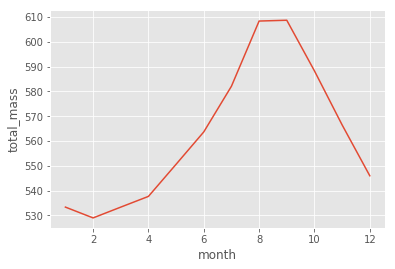

In [12]:
# average monthly total mass during 2002-
ds.total_mass.groupby('time.month').mean().plot()

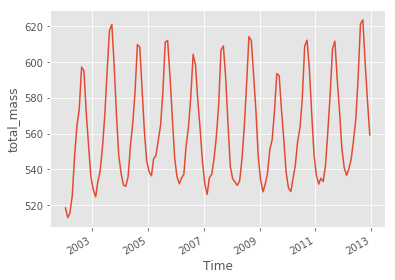

In [20]:
ds.total_mass.groupby('time').mean().plot()
climate=ds.total_mass.groupby('time.month').mean('time')
anol=ds.total_mass.groupby('time.month')-climate


(array([18627528.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 24646488.]),
 array([-3.40282347e+38, -3.06254112e+38, -2.72225877e+38, -2.38197643e+38,
        -2.04169408e+38, -1.70141173e+38, -1.36112939e+38, -1.02084704e+38,
        -6.80564693e+37, -3.40282347e+37,  6.43040352e+04]),
 <a list of 10 Patch objects>)

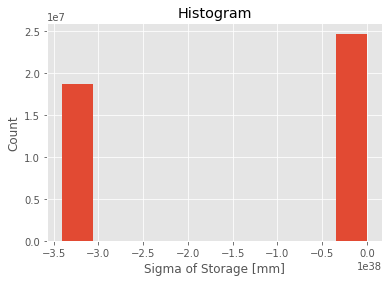

In [22]:
time_slice = slice('2002-01-15', '2012-04-15')

tm_siga = (
    ds.total_mass_sigma
    .sel(time=time_slice)
)
tm_siga.plot()

(array([19829304.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 26236584.]),
 array([-3.40282347e+38, -3.06254112e+38, -2.72225877e+38, -2.38197643e+38,
        -2.04169408e+38, -1.70141173e+38, -1.36112939e+38, -1.02084704e+38,
        -6.80564693e+37, -3.40282347e+37,  6.43040352e+04]),
 <a list of 10 Patch objects>)

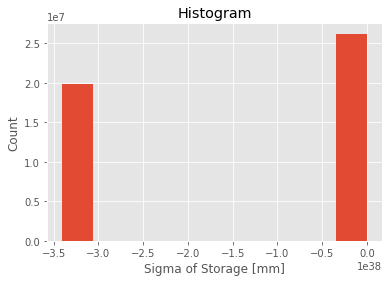

In [29]:
ds.total_mass_sigma.plot()

In [14]:
desiredds = ds[['total_mass','total_mass_sigma']]

In [15]:
import pandas as pd
dt = pd.DatetimeIndex(desiredds.coords['time'].values)

In [40]:
year_starts = dt[dt.is_year_start]

In [41]:
year_ends = dt[dt.is_year_end]

In [42]:
yearslices = [(x,y) for x,y in zip(year_starts, year_ends)]

In [43]:
yearslices

[(Timestamp('2001-01-01 00:00:00'), Timestamp('2001-12-31 00:00:00')),
 (Timestamp('2002-01-01 00:00:00'), Timestamp('2002-12-31 00:00:00')),
 (Timestamp('2003-01-01 00:00:00'), Timestamp('2003-12-31 00:00:00')),
 (Timestamp('2004-01-01 00:00:00'), Timestamp('2004-12-31 00:00:00')),
 (Timestamp('2005-01-01 00:00:00'), Timestamp('2005-12-31 00:00:00')),
 (Timestamp('2006-01-01 00:00:00'), Timestamp('2006-12-31 00:00:00')),
 (Timestamp('2007-01-01 00:00:00'), Timestamp('2007-12-31 00:00:00')),
 (Timestamp('2008-01-01 00:00:00'), Timestamp('2008-12-31 00:00:00')),
 (Timestamp('2009-01-01 00:00:00'), Timestamp('2009-12-31 00:00:00')),
 (Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 00:00:00')),
 (Timestamp('2011-01-01 00:00:00'), Timestamp('2011-12-31 00:00:00')),
 (Timestamp('2012-01-01 00:00:00'), Timestamp('2012-12-31 00:00:00')),
 (Timestamp('2013-01-01 00:00:00'), Timestamp('2013-12-31 00:00:00')),
 (Timestamp('2014-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00')),
 (Time

In [60]:
ncpath = '/att/nobackup/lsetiawa/LISYear/'
if not os.path.exists(ncpath):
    os.mkdir(ncpath)
for ys, ye in yearslices:
    slicedds = desiredds.sel(time = slice(ys, ye))
    procds = slicedds.apply(lambda x: process_da(x))
    procds.to_netcdf(os.path.join(ncpath, 'LIS_{}.nc'.format(ys.year)))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/lsetiawa/miniconda/envs/himat/lib/python3.6/site-packages/xarray/backends/api.py", line 573, in to_netcdf
    unlimited_dims=unlimited_dims)
  File "/home/lsetiawa/miniconda/envs/himat/lib/python3.6/site-packages/xarray/core/dataset.py", line 918, in dump_to_store
    store.sync()
  File "/home/lsetiawa/miniconda/envs/himat/lib/python3.6/site-packages/xarray/backends/netCDF4_.py", line 336, in sync
    super(NetCDF4DataStore, self).sync()
  File "/home/lsetiawa/miniconda/envs/himat/lib/python3.6/site-packages/xarray/backends/common.py", line 202, in sync
    self.writer.sync()
  File "/home/lsetiawa/miniconda/envs/himat/lib/python3.6/site-packages/xarray/backends/common.py", line 179, in sync
    da.store(self.sources, self.targets, lock=GLOBAL_LOCK)
  File "/home/lsetiawa/miniconda/envs/himat/lib/python3.6/site-packages/dask/array/core.py", line 900, in store
    Array._get(dsk, keys, **kwargs)
  File "/home/lsetiawa/miniconda/envs/hima


KeyboardInterrupt



In [51]:
slicedds = desiredds.sel(time = slice(yearslices[0][0], yearslices[0][1]))

In [58]:
slicedds.apply(lambda x: process_da(x))

<xarray.Dataset>
Dimensions:     (east_west: 1896, north_south: 1696, time: 365)
Coordinates:
  * time        (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
    latitude    (north_south, east_west) float64 22.02 22.02 22.02 22.02 ...
    longitude   (north_south, east_west) float64 66.03 66.04 66.05 66.06 ...
Dimensions without coordinates: east_west, north_south
Data variables:
    Qsm_tavg    (time, north_south, east_west) float64 nan nan nan nan nan ...
    Rainf_tavg  (time, north_south, east_west) float64 nan nan nan nan nan ...
    Qs_tavg     (time, north_south, east_west) float64 nan nan nan nan nan ...
    Snowf_tavg  (time, north_south, east_west) float64 nan nan nan nan nan ...
    Qsb_tavg    (time, north_south, east_west) float64 nan nan nan nan nan ...
    Evap_tavg   (time, north_south, east_west) float64 nan nan nan nan nan ...
    TWS_tavg    (time, north_south, east_west) float64 nan nan nan nan nan ...

In [56]:
def process_da(da):
    # attributes for the first 6 variables:
    text = 'Daily {variable} in units of mm we'.format

    # attributes for the TWS:
    
    new_attrs = OrderedDict()
    for k, v in da.attrs.items():
        new_attrs.update({k:v})
    new_attrs.update({'units': 'mm we'})
    
    if da.attrs['standard_name'] == 'terrestrial_water_storage':
        new_attrs.update({'long_name': 'Daily change in water storage'})
        multda = da
    else:
        new_attrs.update({'long_name': text(variable=da.attrs['standard_name'])})
        multda = da * 864000
    
    multda.attrs = new_attrs
    
    return multda

In [ ]:
get_monthly_avg(ds, des_vars, export_nc=False, out_pth=None):

In [ ]:
## NEXT calculate monthly sums, e.g.:

with ProgressBar():
    TWS_monthly = ds['TWS_tavg'].resample('MS', 'time', how = 'sum')

# attributes for the first 6 variables:

{'Cumulative monthly <snowmelt> in units of mm we','Cumulative monthly ....'}

# attributes for TWS:

{'Change in monthly water storage'}
       
# then concatenate all into a single netcdf and serialize to /att/nobackup/aarendt    
    
        